# Business Case, Data Value and Narrative
The crime dataset that we chose has real data and is acquired from UCI Machine Learning repository where the title of the dataset is 'Crime and Communities'. The dataset has large number of numerical columns which was the main reason for choosing such a dataset rather than a categorical one because it makes is easy to apply algorithms and avoids the hassle of conversion of categorical data to numerical data. The crime attributes in the dataset that could be predicted by applying various machine learning algorithms as considered by the FBI are Rape, Murder, Larceny, Robbery, Assault, Burglaries, Autotheft and Arsons.

   The other columns in the dataset include information about community names, county codes, community codes, percent of the population considered urban, age based population, gender based population, race based population and so on which are useful factors to predict crimes. We used some features as predictors from the dataset to train the different models and created a binary label to predict the Occurence of Crime based on the selected features. We also calculated various metrics like accuracy, f1 score, rms value, confusion matrix for the various clustering, regression and classification algorithms that we applied to the dataset.
   
   The state column which was missing from the dataset was added to it based on the enrichment dataset viz cities.json available on the link below which contains mappings of latitude and longitude co-ordinates to their respective cities and states.

Base and Enrichment Dataset Location: https://www.kaggle.com/kkanda/analyzing-uci-crime-and-communities-dataset/data

## Loading the dataset into a Pandas Dataframe

In [3]:
df = pd.read_csv('crimedata.csv',sep= ',', encoding= "ISO-8859-1")

## Data Cleaning

The dataset 'crimedata.csv' was first loaded into a Pandas Dataframe and then some columns were renamed following appropriate naming conventions to make the data readable. Many columns had the character '?' which was replaced by 0 as part of data cleaning. Also, checks were placed to ensure that there were no '?' values at all after cleaning the data.

In [8]:
df=df.rename(columns = {'Êcommunityname':'Community Name'})
df = df.replace('?', '0')
df.head()

,Community Name,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop,mean_violent_crimes,violent_crime_occurence
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,138,1132.08,16,131.26,2,16.41,41.02,1394.59,530.304005,0
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,376,1598.78,26,110.55,1,4.25,127.56,1955.95,530.304005,0
2,Tigardcity,OR,0,0,1,29344,2.43,0.74,94.33,3.43,...,1797,4972.19,136,376.3,22,60.87,218.59,6167.51,530.304005,0
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,716,4142.56,47,271.93,0,0,306.64,0,530.304005,0
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,1060,8490.87,91,728.93,5,40.05,0,9988.79,530.304005,0


In [9]:
df.loc[df['countyCode'] == '?']
df.loc[df['ViolentCrimesPerPop'] == '?']

,Community Name,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop,mean_violent_crimes,violent_crime_occurence


## Criteria Based Label Creation

After studying the dataset carefully, we found out that predicting the occurence of a crime could be a useful and valuable usecase. But, to do so we had to create a label named 'violent_crime_occurence' based on the mean value from the column Violent Crimes Per Population. After calculating the mean and comparing the mean values with the available values in the column 'ViolentCrimesPerPop', a decision 'yes' or '1' was made that a crime has occured if the value in the corresponding column was greater than the mean value or 'no' or '0' if the value was less than the mean. Hence, a binary variable was created.

In [10]:
violent_crimes = list(map(float, df.ViolentCrimesPerPop))
violent_crimes_mean = sum(violent_crimes)/len(violent_crimes)
violent_crimes_mean

530.3040045146731

In [11]:
df['mean_violent_crimes'] = violent_crimes_mean
df['violent_crime_occurence'] = np.where(violent_crimes>=df['mean_violent_crimes'], '1', '0')
df.groupby('violent_crime_occurence').mean()

,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,murders,murdPerPop,mean_violent_crimes
violent_crime_occurence,,,,,,,,,,,,,,,,,,,,,
0,5.509979,32689.042670,2.707529,4.716284,90.651535,2.434721,4.499188,14.372340,27.183125,13.781672,...,52.989732,77.301493,88.433861,20.915279,2383.545630,2.755100,0.433827,2.309704,2.775354,530.304005
1,5.464567,92072.383202,2.706942,18.142375,71.258031,3.119226,14.530604,14.585984,28.525249,14.344055,...,48.771535,77.620039,87.497874,39.823228,3547.116535,3.586522,2.021929,18.166667,11.739829,530.304005


## Data Slicing

In order to apply some clustering as well as classificatioj algorithms, the data needed to be sliced in order to better vizualise it and hence a temporary dataframe was created in order to do so which contained a slice of the actual data.

In [13]:
df1 = df.iloc[:200]
df1.head(200)

,Community Name,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop,mean_violent_crimes,violent_crime_occurence
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,138,1132.08,16,131.26,2,16.41,41.02,1394.59,530.304005,0
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,376,1598.78,26,110.55,1,4.25,127.56,1955.95,530.304005,0
2,Tigardcity,OR,0,0,1,29344,2.43,0.74,94.33,3.43,...,1797,4972.19,136,376.3,22,60.87,218.59,6167.51,530.304005,0
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,716,4142.56,47,271.93,0,0,306.64,0,530.304005,0
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,1060,8490.87,91,728.93,5,40.05,0,9988.79,530.304005,0
5,Springfieldcity,MO,0,0,1,140494,2.45,2.51,95.65,0.90,...,7690,5091.64,454,300.6,134,88.72,442.95,6867.42,530.304005,0
6,Norwoodtown,MA,21,50250,1,28700,2.60,1.60,96.57,1.47,...,288,974.19,144,487.1,17,57.5,226.63,1890.88,530.304005,0
7,Andersoncity,IN,0,0,1,59459,2.45,14.20,84.87,0.40,...,2250,3691.79,125,205.1,9,14.77,439.73,4909.26,530.304005,0
8,Fargocity,ND,17,25700,1,74111,2.46,0.35,97.11,1.25,...,3149,3946.71,206,258.18,8,10.03,115.31,4747.58,530.304005,0
9,Wacocity,TX,0,0,1,103590,2.62,23.14,67.60,0.92,...,6121,5673.63,1070,991.8,18,16.68,1544.24,8903.93,530.304005,1


## Feature Selection for Clustering Algorithms

In [15]:
features = ['householdsize', 'racepctblack']
X = df1[features].values
y = df1['violent_crime_occurence'].astype(float).values

## Plotting the actual data to vizualize it

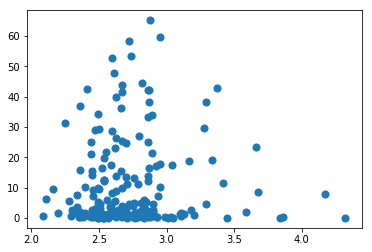

In [16]:
plt.scatter(X[:, 0], X[:, 1], s=50);

## Splitting the data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Using the elbow method to find the optimal number of clusters

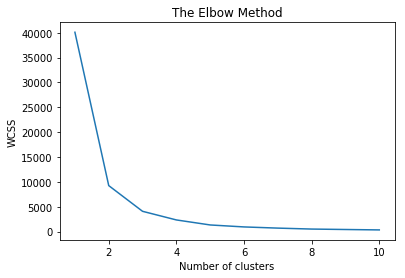

In [19]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans =KMeans(n_clusters =i, init = 'k-means++', max_iter =300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Applying kMeans Algorithm

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)

### Vizualising the clusters

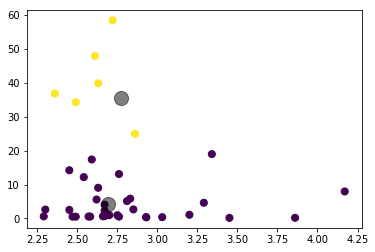

In [24]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Metrics Calculation

In [29]:
kmeans_accuracy = accuracy_score(y_test, y_pred)
kmeans_precison=precision_score(y_test,y_pred,average=None)
kmeans_recall=recall_score(y_test,y_pred,average=None)
kmeans_f1=f1_score(y_test,y_pred,average=None)
kmeans_confusion_matrix = confusion_matrix(y_test, y_pred)

In [30]:
print("K-Means")
print("Scores")
print("Accuracy -->",kmeans_accuracy)
print("Precison -->",kmeans_precison)
print("Recall -->",kmeans_recall)
print("F1 -->",kmeans_f1)

print("Confusion Matrix")
print(kmeans_confusion_matrix)

K-Means
Scores
Accuracy --> 0.725
Precison --> [0.70588235 0.83333333]
Recall --> [0.96       0.33333333]
F1 --> [0.81355932 0.47619048]
Confusion Matrix
[[24  1]
 [10  5]]


## Applying GMM 


### Data Cleaning

In [31]:
#converting huge ranges of data to average values
def extractSubstring(myStr):
    if "-" in myStr :
        lowVal,hiVal = myStr.split("-")  
    
        lowVal = re.sub(r'[^\w]', '', lowVal)
        hiVal = re.sub(r'[^\w]', '', hiVal)
    
        lowVal = atof(lowVal)
        hiVal = atof(hiVal)
        lowV = float(lowVal)
        hiV = float(hiVal)
        average = (lowV + hiV)/2
    else:
        lowVal = myStr
        average = convert_to_float(lowVal)
        
    return average

def convert_to_float(input_str):
    return float(input_str.replace(",",""))

df['PolicReqPerOffic'] = df['PolicReqPerOffic'].apply(extractSubstring)
df['ViolentCrimesPerPop'] = df['ViolentCrimesPerPop'].apply(extractSubstring)

### Feature selection 

In [33]:
Features = ['PolicReqPerOffic','ViolentCrimesPerPop']
X = df[Features].values

### Applying GMM
The intent is to cluster the dataset based on Violent crimes per population and for crimes occuring what number of police are required to control and handle the crime.

In [36]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(X)
labels = gmm.predict(X)

### Vizualising the clusters

Text(0.5, 1.0, 'GMM Clustering')

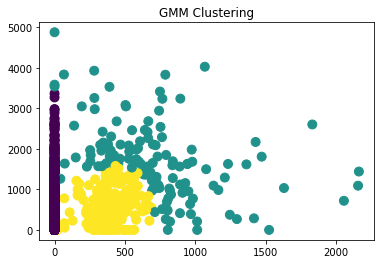

In [37]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=80, cmap='viridis');
plt.title("GMM Clustering")

## Linear Regression

### Feature Selection

In [57]:
X1 = df[['PctUnemployed']].astype(int).values
y1 = df['ViolentCrimesPerPop'].astype(int).values

### Splitting the data

In [58]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

### Fitting the model

In [59]:
from sklearn import datasets, linear_model
regr = linear_model.LinearRegression()
regr.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Predicting the values

In [60]:
y_pred = regr.predict(X1_test)

### Vizualisation of plots

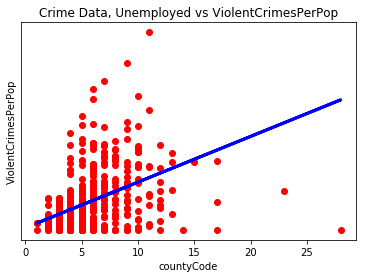

In [61]:
plt.scatter(X1_test, y1_test,  color='red')
plt.plot(X1_test, y_pred, color='blue', linewidth=3)

plt.title('Crime Data, Unemployed vs ViolentCrimesPerPop')
plt.xlabel('countyCode')
plt.ylabel('ViolentCrimesPerPop')

plt.yticks(())
plt.show()

## Logistic Regression

In [63]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Data Slicing

In [209]:
df1 = df.iloc[:200]

### Visualizing Selected Features by plotting their Histograms

In [64]:
age12t21 = df1['agePct12t21'].astype(int)

In [65]:
age12t21.replace('?','0', inplace = True)

<function matplotlib.pyplot.show(*args, **kw)>

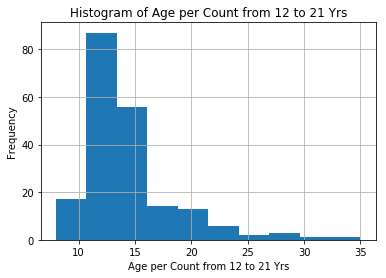

In [66]:
%matplotlib inline
age12t21.hist()
plt.title('Histogram of Age per Count from 12 to 21 Yrs')
plt.xlabel('Age per Count from 12 to 21 Yrs')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

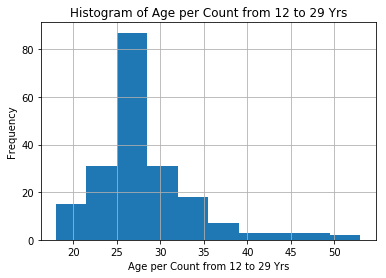

In [67]:
age12t29 = df1['agePct12t29'].astype(int)
%matplotlib inline
age12t29.hist()
plt.title('Histogram of Age per Count from 12 to 29 Yrs')
plt.xlabel('Age per Count from 12 to 29 Yrs')
plt.ylabel('Frequency')
plt.show

### Plotting the features to analyze the label and its frequency

<function matplotlib.pyplot.show(*args, **kw)>

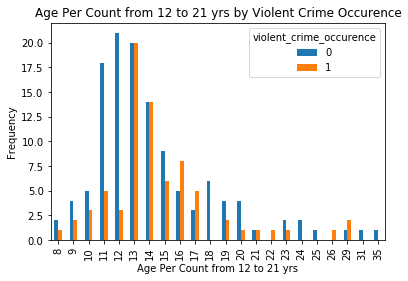

In [72]:
pd.crosstab(age12t21, df1.violent_crime_occurence).plot(kind='bar')
plt.title('Age Per Count from 12 to 21 yrs by Violent Crime Occurence')
plt.xlabel('Age Per Count from 12 to 21 yrs')
plt.xticks(rotation='vertical')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

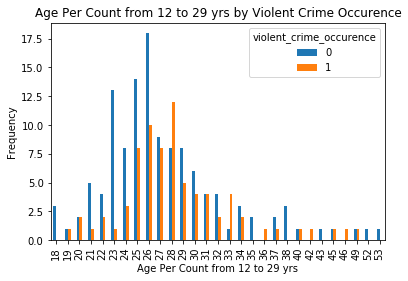

In [69]:
pd.crosstab(age12t29, df1.violent_crime_occurence).plot(kind='bar')
plt.title('Age Per Count from 12 to 29 yrs by Violent Crime Occurence')
plt.xlabel('Age Per Count from 12 to 29 yrs')
plt.xticks(rotation='vertical')
plt.ylabel('Frequency')
plt.show

In [70]:
X_LogReg= ['agePct12t21','agePct12t29','agePct16t24', 'agePct65up', 'PctUnemployed', 'murdPerPop', 'MalePctDivorce']

In [71]:
y_LogReg = df1[['violent_crime_occurence']]

### Training the Model

In [73]:
X_train_LogReg, X_test_LogReg, y_train_LogReg, y_test_LogReg = train_test_split(df1[X_LogReg], y_LogReg, test_size=0.2, random_state=0)

In [74]:
logreg = LogisticRegression()
logreg.fit(X_train_LogReg, y_train_LogReg)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Metrics

In [75]:
y_pred_LogReg = logreg.predict(X_test_LogReg)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_LogReg, y_test_LogReg)))

Accuracy of logistic regression classifier on test set: 0.78


### Creating the Confusion Matrix to make further conclusion 

Model Accuracy for Logistic Regression: 0.775


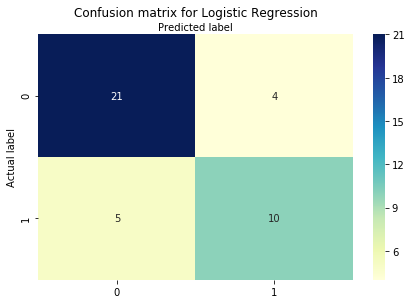

In [76]:
cnf_matrix_LogitRegression = metrics.confusion_matrix(y_test_LogReg, y_pred_LogReg)
cnf_matrix_LogitRegression

class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_LogitRegression), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Logistic Regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Logistic Regression:",metrics.accuracy_score(y_test_LogReg, y_pred_LogReg))


## Decision Tree

Using Decision Tree Classifier from sklearn, we are trying to predict whether a crime has occured based on certain features or not and then calculating the accuracy of the decision tree classifier after training and testing the model.

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [102]:
#X = balance_data.values[:, [5,6,17,37,47,50,56,96,129,131,133,135,137,139,141,143,145]]
df = df[['population','householdsize','medIncome','PctUnemployed','PolicReqPerOffic','murders','rapes','burglaries','robberies','violent_crime_occurence']]
df = df
X_DecisionTree = df.drop('violent_crime_occurence', axis=1)
Y_DecisionTree = df['violent_crime_occurence']

In [103]:
from sklearn.model_selection import train_test_split
X_train_DecisionTree, X_test_DecisionTree, Y_train_DecisionTree, Y_test_DecisionTree = train_test_split(X_DecisionTree, Y_DecisionTree, random_state=1)

### Implementing Decision Tree Classifier

In [104]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=20, min_samples_split=9, min_samples_leaf=6)
clf_gini

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=9,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [105]:
clf_gini.fit(X_train_DecisionTree, Y_train_DecisionTree)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=9,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [106]:
Y_Pred_DecisionTree = clf_gini.predict(X_test_DecisionTree)
Y_Pred_DecisionTree

array(['0', '1', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '1',
       '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0',
       '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '1', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1',
       '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0',
       '0', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '1', '0',
       '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0',
       '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1',
       '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0',
       '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0',
       '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1',
       '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1',
       '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1',
       '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0

### Metrics

In [17]:
ac=accuracy_score(Y_test_DecisionTree, Y_Pred_DecisionTree)*100
ac

85.5595667870036

### Plotting the tree

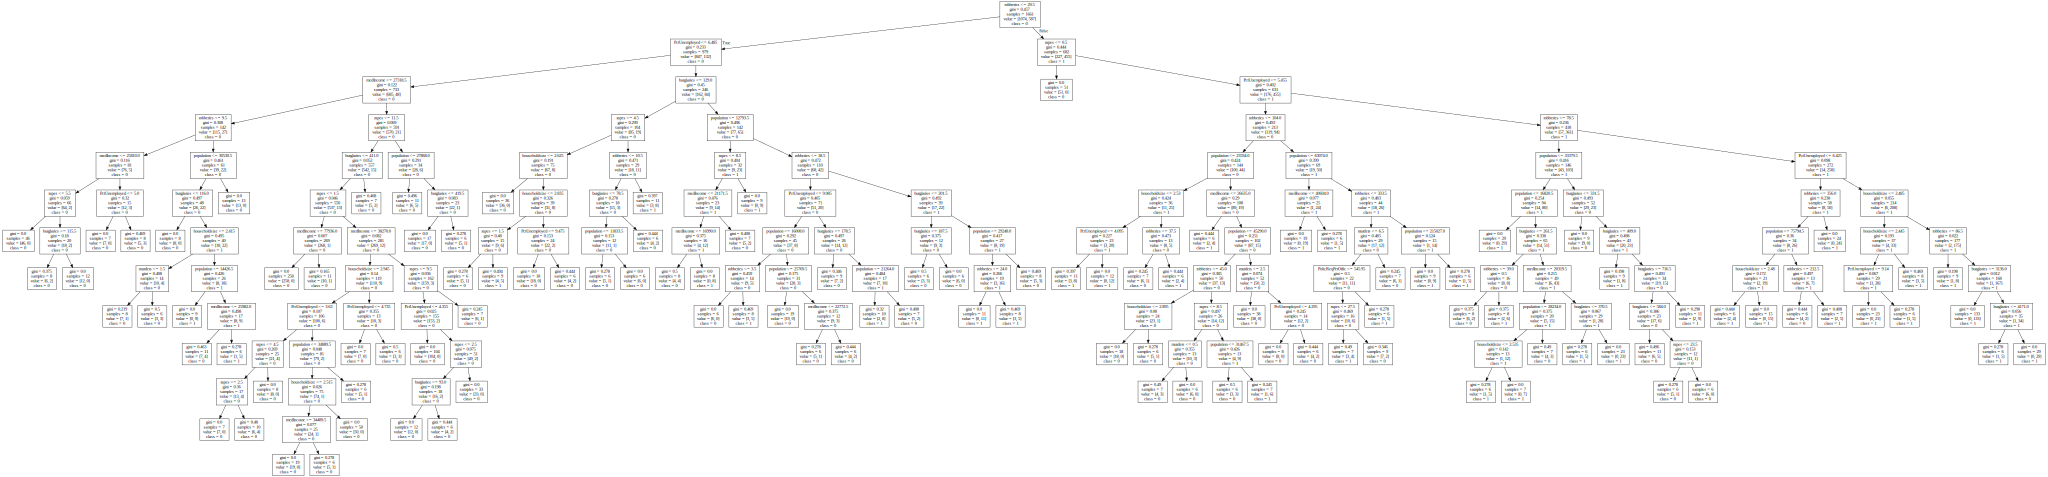

In [107]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, feature_names=X_DecisionTree.columns, class_names=['0','1'])
graph = graphviz.Source(dot_data) 
graph.render("crime") 
graph

### Confusion Matrix

Model Accuracy for Random Forest: 0.855595667870036


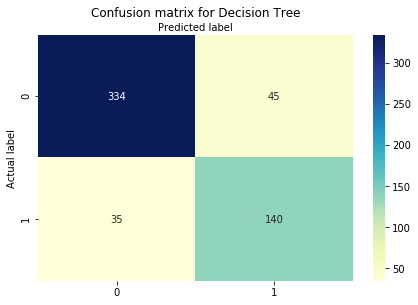

In [108]:
# For Decision Tree
cnf_matrix_DecisionTree = metrics.confusion_matrix(Y_test_DecisionTree, Y_Pred_DecisionTree)
cnf_matrix_DecisionTree
# name  of classes
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_DecisionTree), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Decision Tree', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Random Forest:",metrics.accuracy_score(Y_test_DecisionTree, Y_Pred_DecisionTree))

## Gaussian Naive Bayes Classifier

### Label Creation

In [113]:
murder = list(map(float, df.murdPerPop))
murders_mean = sum(murder)/len(murder)
murders_mean

5.8592957110609545

In [114]:
df['mean_murder'] = murders_mean
df['murder_occurence'] = np.where(murder>=df['mean_murder'], 'yes', 'no')
df.groupby('murder_occurence').mean()

,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,murders,murdPerPop,mean_murder
murder_occurence,,,,,,,,,,,,,,,,,,,,,
no,5.511692,29966.262724,2.708425,4.346499,90.388755,2.568191,5.626314,14.318920,27.257166,13.797407,...,52.455076,76.972270,88.175915,20.060523,2497.271045,2.755475,0.460784,0.545392,1.055365,5.859296
yes,5.461235,97352.679369,2.705230,18.866544,71.734625,2.865112,12.390250,14.688331,28.385545,14.314731,...,49.787530,78.249488,87.989488,41.481209,3331.356767,3.586899,1.972510,21.558476,15.037898,5.859296


### Data Slicing

In [115]:
df1 = df.iloc[:700]

### Applying Gaussian NB classifier

In [116]:
X_NaiveBayes= ['agePct12t21','agePct12t29','agePct16t24', 'agePct65up','PctUnemployed']
Y_NaiveBayes = df1[['murder_occurence']]

In [117]:
X_train_NaiveBayes, X_test_NaiveBayes, Y_train_NaiveBayes, Y_test_NaiveBayes = train_test_split(df1[X_NaiveBayes], Y_NaiveBayes, test_size=0.2, random_state=0)

In [118]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [119]:
model.fit(X_train_NaiveBayes, Y_train_NaiveBayes)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

### Model Accuracy 

In [120]:
Y_Pred_NaiveBayes = model.predict(X_test_NaiveBayes)
print('Accuracy of Gaussian Naive Bayes classifier on test set: {:.2f}'.format(model.score(X_test_NaiveBayes, Y_test_NaiveBayes)))

Accuracy of Gaussian Naive Bayes classifier on test set: 0.79


### Corelation matrix showing the features 

In [121]:
df1[X_NaiveBayes].corr()

,agePct12t21,agePct12t29,agePct16t24,agePct65up,PctUnemployed
agePct12t21,1.000000,0.857899,0.923780,-0.362218,0.219374
agePct12t29,0.857899,1.000000,0.946554,-0.484518,0.159712
agePct16t24,0.923780,0.946554,1.000000,-0.288004,0.141656
agePct65up,-0.362218,-0.484518,-0.288004,1.000000,0.131281
PctUnemployed,0.219374,0.159712,0.141656,0.131281,1.000000


### Corelation Heatmap for better visualization 

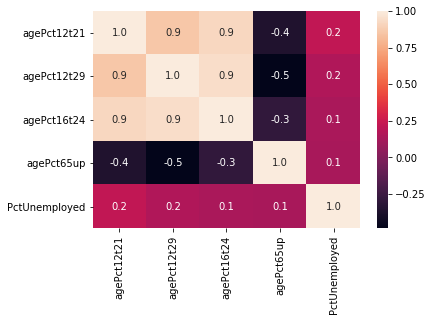

In [122]:
import seaborn as sns
sns.heatmap(df1[X_NaiveBayes].corr(), annot=True, fmt=".1f")
plt.show()

## Confusion Matrix

Model Accuracy for Random Forest: 0.7928571428571428


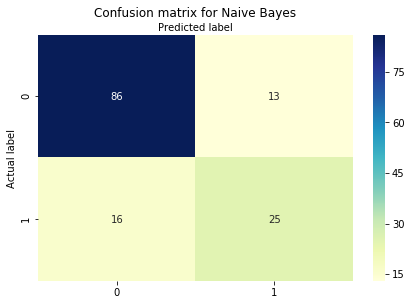

In [123]:
cnf_matrix_NaiveBayes = metrics.confusion_matrix(Y_test_NaiveBayes, Y_Pred_NaiveBayes)
cnf_matrix_NaiveBayes
# name  of classes
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_NaiveBayes), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Naive Bayes', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Random Forest:",metrics.accuracy_score(Y_test_NaiveBayes, Y_Pred_NaiveBayes))

## Random Forest Classifier

### Label Creation

In [124]:
df['mean_violent_crimes'] = violent_crimes_mean
df['violent_crime_occurence'] = np.where(violent_crimes>=df['mean_violent_crimes'], '1', '0')
df.groupby('violent_crime_occurence').mean()

,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,murders,murdPerPop,mean_murder,mean_violent_crimes
violent_crime_occurence,,,,,,,,,,,,,,,,,,,,,
0,5.509979,32689.042670,2.707529,4.716284,90.651535,2.434721,4.499188,14.372340,27.183125,13.781672,...,77.301493,88.433861,20.915279,2383.545630,2.755100,0.433827,2.309704,2.775354,5.859296,530.304005
1,5.464567,92072.383202,2.706942,18.142375,71.258031,3.119226,14.530604,14.585984,28.525249,14.344055,...,77.620039,87.497874,39.823228,3547.116535,3.586522,2.021929,18.166667,11.739829,5.859296,530.304005


### Feature Selection

In [125]:
df = df[['population','householdsize','medIncome','PctUnemployed','PolicReqPerOffic','murders','rapes','burglaries','robberies','violent_crime_occurence']]
df = df
X = df.drop('violent_crime_occurence', axis=1)
y = df['violent_crime_occurence']

In [126]:
X_train_RandomForest, X_test_RandomForest, Y_train_RandomForest, Y_test_RandomForest = train_test_split(X, y, random_state=1)

### Calculating gini index for Random Forest Classifier

In [127]:
from sklearn.ensemble import RandomForestClassifier
clf_gini = RandomForestClassifier(criterion = "gini",random_state = 200,max_depth=30, min_samples_split=9, min_samples_leaf=6)
clf_gini

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=9,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=200, verbose=0, warm_start=False)

### Fitting and predicitng the model

In [128]:
clf_gini.fit(X_train_RandomForest, Y_train_RandomForest)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=9,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=200, verbose=0, warm_start=False)

In [129]:
Y_Pred_RandomForest = clf_gini.predict(X_test_RandomForest)

### Metrics

In [130]:
ac=accuracy_score(Y_test_RandomForest,Y_Pred_RandomForest)*100
ac

86.64259927797833

### Confusion Matrix

In [131]:
cnf_matrix_RandomForest = metrics.confusion_matrix(Y_test_RandomForest, Y_Pred_RandomForest)
cnf_matrix_RandomForest

array([[345,  34],
       [ 40, 135]])

Model Accuracy for Random Forest: 0.8664259927797834


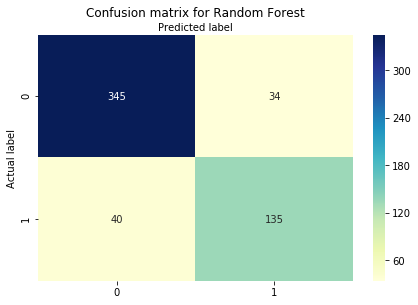

In [132]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_RandomForest), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Random Forest:",metrics.accuracy_score(Y_test_RandomForest, Y_Pred_RandomForest))

## SVM

In [144]:
#X = balance_data.values[:, [5,6,17,37,47,50,56,96,129,131,133,135,137,139,141,143,145]]
df2 = df2[['population','householdsize','racePctWhite','racepctblack','racePctHisp','medIncome','PctUnemployed','PolicReqPerOffic','murders','rapes','burglaries','robberies','violent_crime_occurence']]
df2 = df2

In [145]:
X_SVM = df2.iloc[:, [3, 4]].values
Y_SVM = df2.iloc[:, 12].values

### Splitting the dataset into the Training set and Test set

In [146]:
from sklearn.cross_validation import train_test_split
X_train_SVM, X_test_SVM, Y_train_SVM, Y_test_SVM = train_test_split(X_SVM, Y_SVM, test_size = 0.30, random_state = 0)

### Feature Scaling

In [147]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_SVM = sc.fit_transform(X_train_SVM)
X_test_SVM = sc.transform(X_test_SVM)
print(X_train_SVM)

[[ 0.557996   -0.49362092]
 [-0.58847309 -0.28112885]
 [-0.62648141  3.73638802]
 ...
 [-0.27887807  1.55338608]
 [-0.55737538 -0.35266784]
 [ 0.01551364  0.09498213]]


### Training & fitting the model

In [148]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',random_state = 0)
classifier.fit(X_train_SVM, Y_train_SVM)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [149]:
Y_Pred_SVM = classifier.predict(X_test_SVM)

The support vectors for the model are as follows


In [150]:
print(classifier.support_vectors_)

[[ 0.5282804  -0.43128991]
 [-0.24847141  0.92865938]
 [-0.21530052 -0.43483145]
 ...
 [ 0.69275276 -0.09059428]
 [-0.27887807  1.55338608]
 [ 0.01551364  0.09498213]]


### Confusion Matrix

Model Accuracy for SVM: 0.8090225563909774


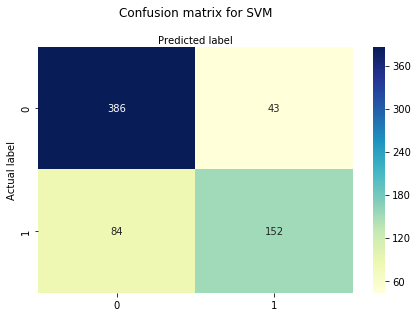

In [113]:
cnf_matrix_RandomForest = metrics.confusion_matrix(Y_test_SVM, Y_Pred_SVM)
cnf_matrix_RandomForest
# name  of classes
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_RandomForest), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for SVM', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for SVM:",metrics.accuracy_score(Y_test_SVM, Y_Pred_SVM))


### Accuracy

In [151]:
ac=accuracy_score(Y_test_SVM,Y_Pred_SVM)*100
ac

80.90225563909775

### Vizualising model results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


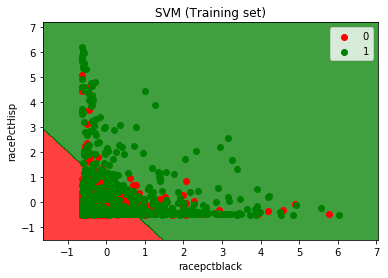

In [152]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_SVM, Y_train_SVM
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('racepctblack')
plt.ylabel('racePctHisp')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


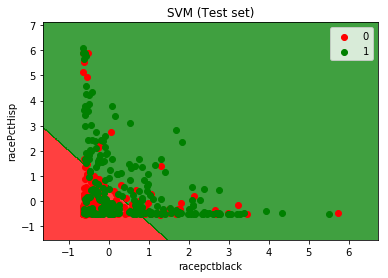

In [153]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_SVM, Y_test_SVM
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('racepctblack')
plt.ylabel('racePctHisp')
plt.legend()
plt.show()

### Fitting SVM to the Training set

In [154]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train_SVM, Y_train_SVM)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [155]:
Y_Pred_SVMrbf = classifier.predict(X_test_SVM)

Model Accuracy for Random Forest: 0.7984962406015037


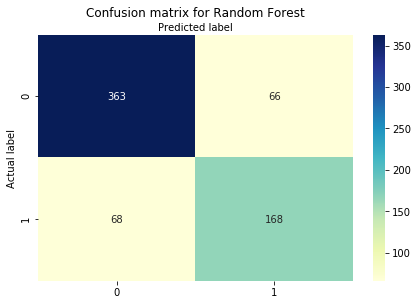

In [156]:
cnf_matrix_RandomForest = metrics.confusion_matrix(Y_test_SVM, Y_Pred_SVMrbf)
cnf_matrix_RandomForest
# name  of classes
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_RandomForest), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Random Forest:",metrics.accuracy_score(Y_test_SVM, Y_Pred_SVMrbf))


In [157]:
ac=accuracy_score(Y_test_SVM,Y_Pred_SVMrbf)*100
ac

79.84962406015038

## PCA

Principal Component Analysis(PCA)
PCA is one of the ways to speed up a Machine Learning algorithm so that it fits faster to the training data. There might be a case where the input data or features might be in a higher dimension resulting in slow learning algorithm which takes a long time. To reduce the dimensionality without affecting or loosing any information which can be seen by the variance ratio. One of the aim of PCA is to maximise variance that is, after PCA is applied and if we want to reconstruct the original data back from the principal components, variance or information gained should be maximised or the information lost while doing so minimised.
On our crime dataset, we applied PCA over the Age columns with certain age ranges in order to reduce the feature dimensionality into a 2 dimensional space and plot the features against the label 'violent_crime_occurence' to see the result of applying PCA. The feature set first needs to be standardized and scaled well to give us accurate results. The feature set consists of the following columns from the dataset: 'agePct12t21',''agePct12t29,'agePct16t24'and 'agePct65up'.

In [160]:
from sklearn.cross_validation import cross_val_score

### Individual feature vs label plots to vizualize data before applying PCA

<function matplotlib.pyplot.show(*args, **kw)>

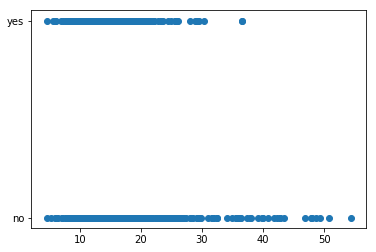

In [161]:
X3 = df['agePct12t21'].values
y3 = df['violent_crime_occurence'].values
plt.scatter(X3, y3)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

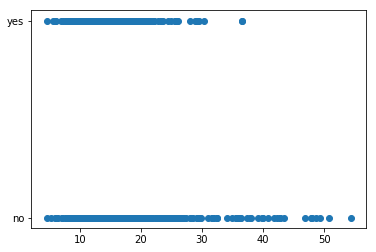

In [162]:
X4 = df['agePct12t21'].values
y4 = df['violent_crime_occurence'].values
plt.scatter(X4, y4)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

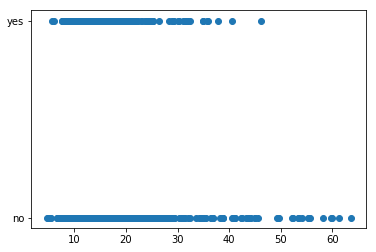

In [163]:
X5 = df['agePct16t24'].values
y5 = df['violent_crime_occurence'].values
plt.scatter(X5, y5)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

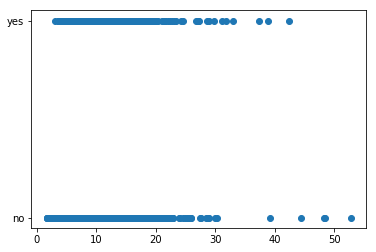

In [164]:
X6 = df['agePct65up'].values
y6 = df['violent_crime_occurence'].values
plt.scatter(X6, y6)
plt.show

### Vizualization Inference

It can be inferred that all the Age range features have similar kind of a relationship with the label and hence could be combined in order to reduce the dimensionality and hence speed up the learning process of a model.

### Feature Selection

In [165]:
features = ['agePct12t21','agePct12t29','agePct16t24', 'agePct65up']
X= df.loc[:, features].values
y = df.loc[:, ['violent_crime_occurence']].values

### Splitting Dataset into Test and Training Data


In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Scaling and Standardizing Data

In [167]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Applying PCA from sklearn for 2 Principal Components

In [168]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
explained_variance = pca.explained_variance_ratio_

### Final Dataframe with label concatenated with features

In [169]:
finalDf = pd.concat([principalDf, df[['violent_crime_occurence']]], axis = 1)

### Plot to observe the 2 Principal Components as a result of PCA 

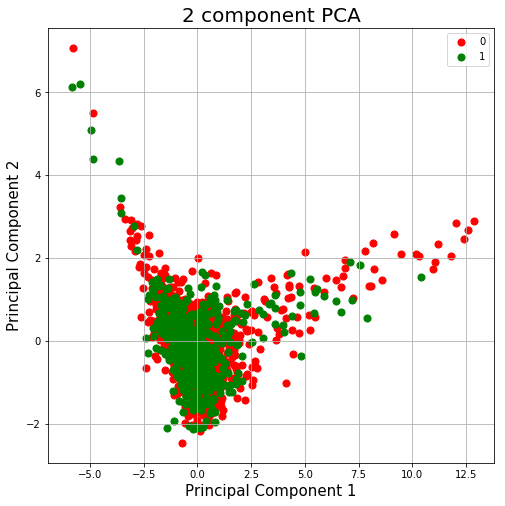

In [117]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['0', '1']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['violent_crime_occurence'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Variance Ratio
The variance ratio values are 75.94% and 20.71% meaning that approximately 96% of the information can recontructed from the model and hence the Principal Components are as per model conventions.

In [171]:
print(explained_variance)

[0.75942017 0.20717271]


## KNN

In [195]:
X_KNN = balance_data.iloc[:, [2,6]].values
Y_KNN = balance_data.iloc[:, 12].values

### Splitting the dataset into the Training set and Test set

In [196]:
from sklearn.cross_validation import train_test_split
X_train_KNN, X_test_KNN, Y_train_KNN, Y_test_KNN = train_test_split(X_KNN, Y_KNN, test_size = 0.30, random_state = 0)

### Feature Scaling

In [197]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_KNN = sc.fit_transform(X_train_KNN)
X_test_KNN = sc.transform(X_test_KNN)

### Training and testing the model

In [198]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train_KNN, Y_train_KNN)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [199]:
# Predicting the Test set results
Y_Pred_KNN = classifier.predict(X_test_KNN)

### Accuracy, Confusion Matrix & Heatmap

In [200]:
ac=accuracy_score(Y_test_KNN,Y_Pred_KNN)*100
ac

79.84962406015038

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


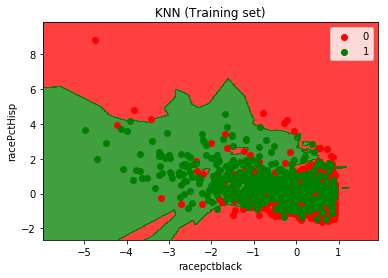

In [201]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_KNN, Y_train_KNN
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN (Training set)')
plt.xlabel('racepctblack')
plt.ylabel('racePctHisp')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


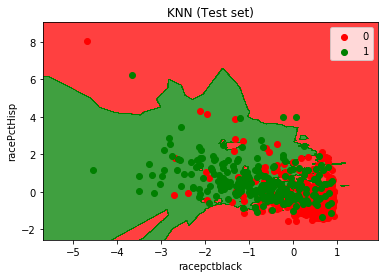

In [202]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_KNN, Y_test_KNN
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN (Test set)')
plt.xlabel('racepctblack')
plt.ylabel('racePctHisp')
plt.legend()
plt.show()

Model Accuracy for Random Forest: 0.7984962406015037


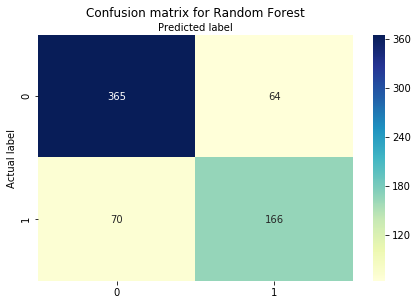

In [203]:
cnf_matrix_RandomForest = metrics.confusion_matrix(Y_test_KNN, Y_Pred_KNN)
cnf_matrix_RandomForest
# name  of classes
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_RandomForest), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Random Forest:",metrics.accuracy_score(Y_test_KNN, Y_Pred_KNN))

# Conclusion

The predictions made by various classification algorithms show the occurence possibility of a crime whether a crime will occur or not, if a crime occurs, will it be a violent or a non-violent crime or if a crime occurs, is the cause of the crime murder or not. These predictions might help the local police departments as well as the FBI solve many cases with esfficiency and accuracy.

   Among the classification algorithms, Random Forest Classifier performs the best making a decision based on majority vote and constructing a decision tree for each feature. The highest accuracy achieve with Random Forest Classifier is 86.86%. Also, we observed that the dataset performs well with non-linear data as compared to linear data hence not so good results were achieved with Linear Regression.